# K Means Clustering 

**K Means clustering** is an unsupervised learning algorithm that tries to cluster data based on thier similarity. Unsupervised learning meas that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data.

In K means clustering, we have to specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

The K means algorithm has the advantage that it’s pretty fast, as all we’re really doing is computing the distances between points and group centers. On the other hand, it has couple of disadvantages: (1) we have to specify the number of cluster, which is not trivial and ideally we want to figure this out. (2) It starts with a random choice of cluster centers and therefore it may yield different clustering results on different runs of the algorithm. 

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression

**For this project we will use K mean clustering to cluster universities into groups: public and private**

It is very important to note, we actually have the labels for this data set, but we will **NOT** use them for the K means clustering algorithm, since that is an unsupervised learning algorithm.

## The Data

We will use a data frame with 777 observations on the following 18 variables. The data set can be download from https://www.kaggle.com/flyingwombat/us-news-and-world-reports-college-data
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the data

In [2]:
df = pd.read_csv('../College_Data')

In [3]:
df.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


Let us use the first column as the index.

In [4]:
df = df = pd.read_csv('../College_Data',index_col=0)

In [5]:
df.head(2)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [7]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### Data visualization

#### Grad.Rate versus Room.Board

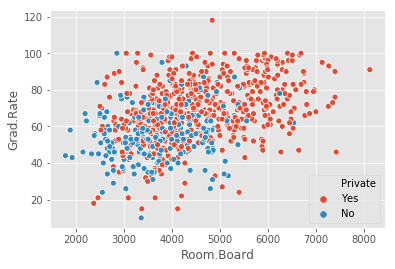

In [8]:
plt.style.use('ggplot')
#sns.lmplot(x='Room.Board',y='Grad.Rate',data=df,hue='Private',fit_reg=False)
sns.scatterplot(x=df['Room.Board'],y=df['Grad.Rate'],hue=df['Private'])

#### F.Undergrad versus Outstate

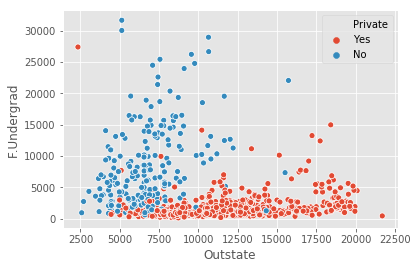

In [9]:
#sns.lmplot(x='Outstate',y='F.Undergrad',data=df,hue='Private',fit_reg=False)
sns.scatterplot(x=df['Outstate'],y=df['F.Undergrad'],hue=df['Private'])

#### Outstate histogram (Public, private seperately) 

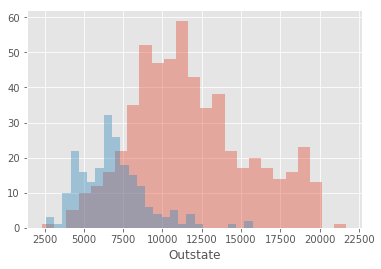

In [10]:
sns.distplot(df['Outstate'][df['Private']=='Yes'],kde=False,bins=25)
sns.distplot(df['Outstate'][df['Private']=='No'],kde=False,bins=25)
#g = sns.FacetGrid(df,hue='Private',aspect=1.5,height=4)
#g = g.map(plt.hist, 'Outstate',bins=25,alpha=0.7)

#### Grade.Rate histogram

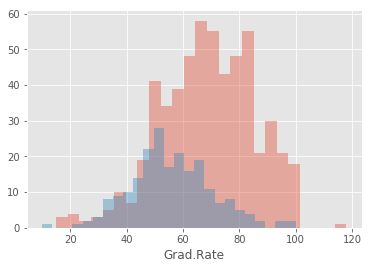

In [11]:
sns.distplot(df['Grad.Rate'][df['Private']=='Yes'],kde=False,bins=25)
sns.distplot(df['Grad.Rate'][df['Private']=='No'],kde=False,bins=25)

Grade Rate>100% does not make any sense. Let's replace it with 100%.

In [12]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [13]:
df['Grad.Rate']['Cazenovia College']

118

In [14]:
df['Grad.Rate']['Cazenovia College']=100

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df['Grad.Rate']['Cazenovia College']

100

### K Means cluster creation

In [16]:
from sklearn.cluster import KMeans

**Create an instance of a K Means model with 2 clusters. Latter we will try elbow method.**

In [17]:
kmeans  = KMeans(n_clusters=2)

**As we can not use label for K Means clustering, we have to drop 'Private' column.**

In [18]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### cluster center vector (must be 17 dimensional vector)

In [19]:
print(kmeans.cluster_centers_)

[[1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.50926756e+01]
 [1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]]


In [20]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

**There is no perfect way to evaluate clustering if you don't have the labels. But since we have lable for this exercise, let's utilize this to check the performance of K Means clustering**

**Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [21]:
df['Cluster']=np.nan

In [31]:
def clustering(x):
    if x=='Yes':
        return 1
    else:
        return 0

In [32]:
df['Cluster']=df['Private'].apply(clustering)

In [33]:
df.tail(10)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Winthrop University,No,2320,1805,769,24,61,3395,670,6400,3392,580,2150,71,80,12.8,26,6729,59,0
Wisconsin Lutheran College,Yes,152,128,75,17,41,282,22,9100,3700,500,1400,48,48,8.5,26,8960,50,1
Wittenberg University,Yes,1979,1739,575,42,68,1980,144,15948,4404,400,800,82,95,12.8,29,10414,78,1
Wofford College,Yes,1501,935,273,51,83,1059,34,12680,4150,605,1440,91,92,15.3,42,7875,75,1
Worcester Polytechnic Institute,Yes,2768,2314,682,49,86,2802,86,15884,5370,530,730,92,94,15.2,34,10774,82,1
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1
York College of Pennsylvania,Yes,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99,1


**Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
confusion_matrix(df['Cluster'],kmeans.labels_)

array([[138,  74],
       [531,  34]])

In [36]:
print(classification_report(df['Cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

   micro avg       0.22      0.22      0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



##### Not so bad!
Let's visualize F.Undergrad versus Outstate again after K means clustering.

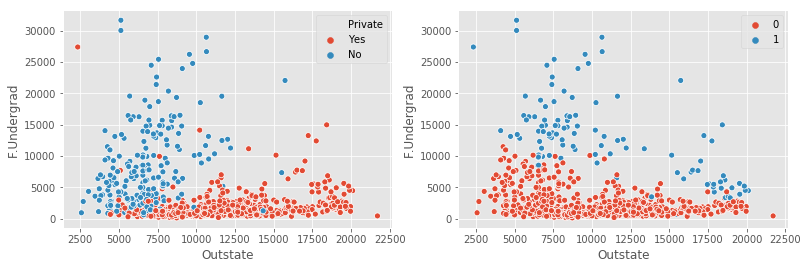

In [37]:
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.scatterplot(x=df['Outstate'],y=df['F.Undergrad'],hue=df['Private'],ax=ax1)
sns.scatterplot(x=df['Outstate'],y=df['F.Undergrad'],hue=kmeans.labels_,ax=ax2)

### Let us now check the improvement (if any) with normalizing the data.

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
df_norm = df.drop(['Private', 'Cluster'],axis=1)

In [40]:
df_norm.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [41]:
df_norm_1 = StandardScaler().fit_transform(df_norm)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [42]:
kmeans_n  = KMeans(n_clusters=2)

In [43]:
kmeans_n.fit(df_norm_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
print(kmeans_n.labels_)

[0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 

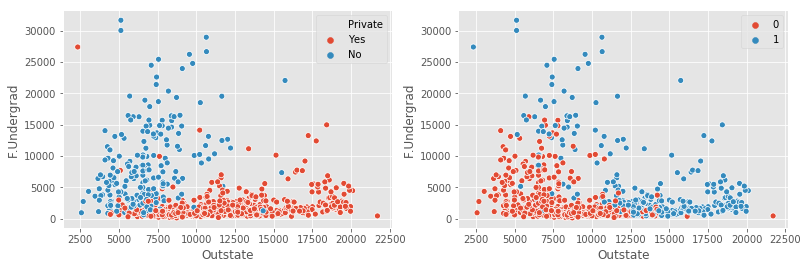

In [45]:
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.scatterplot(x=df['Outstate'],y=df['F.Undergrad'],hue=df['Private'],ax=ax1)
sns.scatterplot(x=df['Outstate'],y=df['F.Undergrad'],hue=kmeans_n.labels_,ax=ax2)

In [46]:
confusion_matrix(df['Cluster'],kmeans_n.labels_)

array([[146,  66],
       [340, 225]])

In [47]:
print(classification_report(df['Cluster'],kmeans_n.labels_))

              precision    recall  f1-score   support

           0       0.30      0.69      0.42       212
           1       0.77      0.40      0.53       565

   micro avg       0.48      0.48      0.48       777
   macro avg       0.54      0.54      0.47       777
weighted avg       0.64      0.48      0.50       777



In [49]:
distortion = []
K = range(1,10)

for k in K:
    kmeanModel=KMeans(n_clusters=k).fit(df.drop(['Private', 'Cluster'],axis=1))
    kmeanModel.fit(df.drop(['Private', 'Cluster'],axis=1))
    distortion.append(kmeanModel.inertia_)

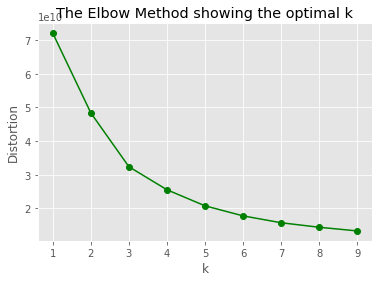

In [50]:
plt.plot(K, distortion, 'go-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Elbow method shows, n_cluster = 4 may be the good choice. For this exercise this is the end, we will utilize this in our next exercise of **Customer Segmentation with K-Means.**  